# EEG Sleepiness Prediction using Machine Learning

This notebook analyzes EEG signals from drivers using a NeuroSky MindWave sensor and builds a machine learning model to predict whether a driver is sleepy or not based on EEG signal features.

Source of Dataset: [Sleepy Driver EEG Brainwave Data (Kaggle)](https://www.kaggle.com/datasets/naddamuhhamed/sleepy-driver-eeg-brainwave-data?resource=download)


In [1]:
import pandas as pd

# Load the dataset
file_path = "acquiredDataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma,classification
0,26,34,960462,277180,26575,27356,26575,13056,9126,2683,0
1,29,54,39145,28225,20172,39551,20172,9933,5237,4750,0
2,40,48,75410,43144,8601,13564,8601,11663,2515,3251,0
3,66,47,16057,41211,2534,34254,2534,27663,11396,2825,0
4,81,67,10304,47239,33158,47349,33158,16328,5298,5471,0


In [2]:
# Check dataset information
df.info()

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Display basic statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   attention       3735 non-null   int64
 1   meditation      3735 non-null   int64
 2   delta           3735 non-null   int64
 3   theta           3735 non-null   int64
 4   lowAlpha        3735 non-null   int64
 5   highAlpha       3735 non-null   int64
 6   lowBeta         3735 non-null   int64
 7   highBeta        3735 non-null   int64
 8   lowGamma        3735 non-null   int64
 9   highGamma       3735 non-null   int64
 10  classification  3735 non-null   int64
dtypes: int64(11)
memory usage: 321.1 KB
Missing Values:
attention         0
meditation        0
delta             0
theta             0
lowAlpha          0
highAlpha         0
lowBeta           0
highBeta          0
lowGamma          0
highGamma         0
classification    0
dtype: int64


,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma,classification
count,3735.000000,3735.000000,3.735000e+03,3.735000e+03,3735.000000,3735.000000,3735.000000,3735.000000,3735.000000,3.735000e+03,3735.00000
mean,48.214726,56.577510,5.187714e+05,1.362420e+05,33413.343775,30580.759036,25640.069076,23276.979384,8117.130388,2.087258e+05,0.42838
std,21.876949,19.066577,5.997837e+05,2.175501e+05,51970.930842,52681.858764,37159.039642,43921.116122,15522.904383,3.297073e+05,0.49491
min,1.000000,1.000000,2.160000e+02,1.380000e+02,32.000000,9.000000,2.000000,3.000000,6.000000,4.700000e+01,0.00000
25%,35.000000,43.000000,7.199650e+04,2.347200e+04,7402.000000,6908.500000,6240.000000,4862.000000,2247.000000,5.683000e+03,0.00000
50%,48.000000,56.000000,2.773820e+05,5.797200e+04,16481.000000,14928.000000,13841.000000,9739.000000,4440.000000,5.719800e+04,0.00000
75%,63.000000,69.000000,7.780680e+05,1.514855e+05,37721.500000,33147.500000,30236.000000,20796.500000,8813.000000,2.576875e+05,1.00000
max,100.000000,100.000000,3.598743e+06,3.194358e+06,699008.000000,785947.000000,595549.000000,443589.000000,289281.000000,2.328370e+06,1.00000


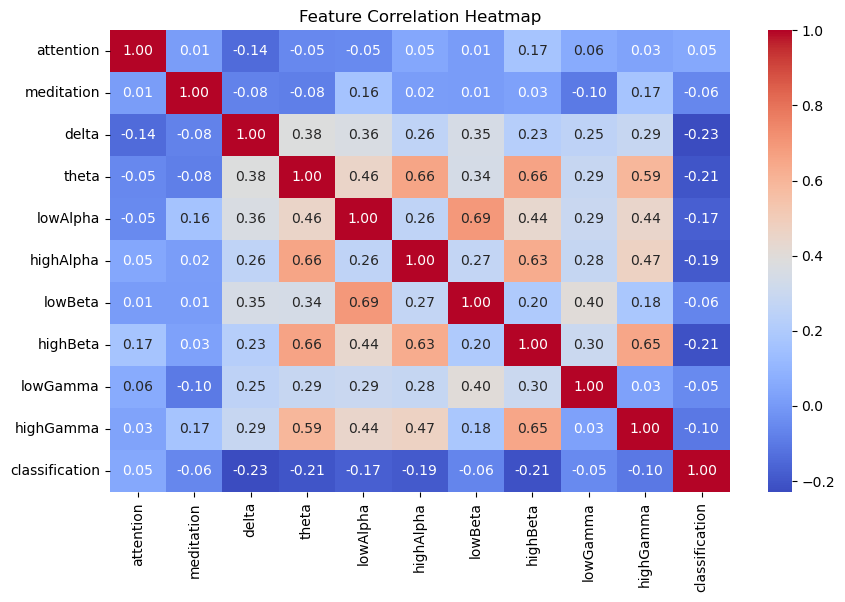

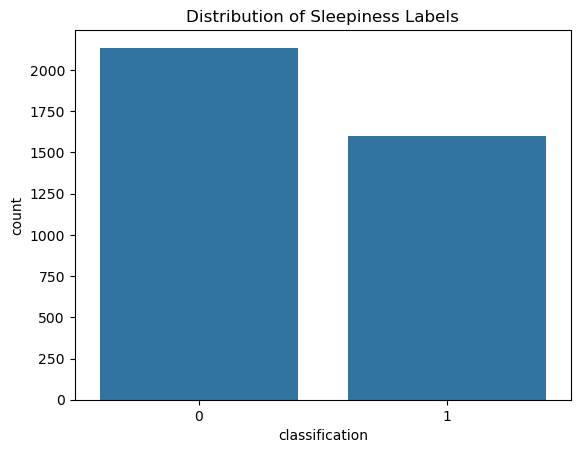

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Countplot for classification labels
sns.countplot(x=df["classification"])
plt.title("Distribution of Sleepiness Labels")
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df.drop(columns=["classification"])
y = df["classification"]

# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Accuracy: 0.784471218206158
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       438
           1       0.76      0.70      0.73       309

    accuracy                           0.78       747
   macro avg       0.78      0.77      0.78       747
weighted avg       0.78      0.78      0.78       747



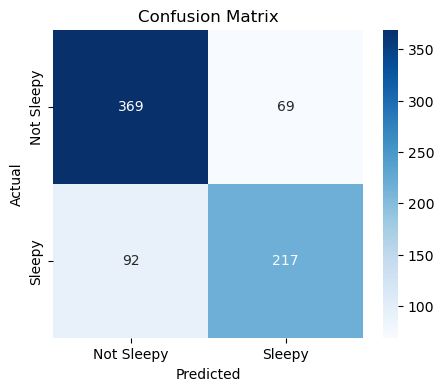

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Sleepy", "Sleepy"], yticklabels=["Not Sleepy", "Sleepy"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Model Performance Analysis

# Understanding Model Performance

## Accuracy
The accuracy score provides an overall measure of how well the model is predicting the correct labels. A high accuracy indicates that the classifier is effectively distinguishing between sleepy and non-sleepy states.

## Classification Report
The classification report includes precision, recall, and F1-score for both classes:
- **Precision**: Measures how many of the predicted "sleepy" cases were actually correct.
- **Recall**: Measures how many of the actual "sleepy" cases were correctly identified.
- **F1-score**: Balances precision and recall to give an overall effectiveness measure.

A good model should have high precision and recall for both classes to avoid false positives (wrongly predicting sleepiness) and false negatives (failing to detect a sleepy driver).

## Confusion Matrix
The confusion matrix visualizes the number of correct and incorrect predictions:
- True Positives (TP): Correctly predicted sleepy cases.
- True Negatives (TN): Correctly predicted non-sleepy cases.
- False Positives (FP): Incorrectly predicted sleepy cases (driver is actually awake).
- False Negatives (FN): Incorrectly predicted non-sleepy cases (driver is actually sleepy).

A well-performing model should have a low number of false negatives to ensure it accurately detects drowsy drivers.